<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Michael!

I'm happy to review your project today 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments. If you have any questions, don't hesitate to respond to my comments in a different section.
    
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>     


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>General Feedback</b>  
 
Hello Michael,  
    
You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.

After reviewing your submission, I’ve returned it with some feedback to help you make the necessary improvements. You can find my more detailed feedaback within your project file in the `Reviewer's comment v1` section.
    
Keep in mind that revisions are a normal and valuable part of the learning process. Use this feedback to refine your work and resubmit when you’re ready. I know you’re capable of great things, and I’m here to support you every step of the way. Keep going—you’re doing a great job! 🏄
    
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2</b>
    
<b>General Feedback</b> 
    
Hi Michael, you did an amazing job! 💫 Thank you for going the extra mile and making changes to your project.

Everything is perfect now. There are no critical issues left, so your project has been accepted!

Wishing you interesting projects in the upcoming sprints! ☘️

# Integrated Project: ICE analysis ##

## Introduction: ##
The goal of this analysis is to create a synopsis for the year 2017 and analyse all the given information in the dataset to accurately utilise the right information in this endeavour. By understanding total and regional sales, platform and genre popularity as well as the relationship between user and critical input and game success and popularity the hope is to paint a picture though trend and pattern recognition that points ICE as a company in the right direction in terms of the most profitable and safe way to go in terms of platform investment, game distribution and rating, as well as the marketablity of games and platforms going forward. The analysis will be broken down into phases first processing and analysing the data assesing the information for utility and applicability and formulating conclusions from the analysis

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Great job adding additional information about the project goal. It would also be helpful to share the steps you plan to complete.

</div>

In [1]:
#Imported all the necessary libraries 
import pandas as pd 
import numpy as np 
import math 
import seaborn as sns 
from scipy import stats as st 
from math import factorial
from matplotlib import pyplot as plt 
from scipy.stats import ttest_ind

In [2]:
#Added 'df_ice' to store the information from the dataset
df_ice = pd.read_csv('/datasets/games.csv')

In [3]:
#Checking the data with 'head()'
df_ice.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#Getting the information for data with 'info()'
df_ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#Getting overall description with 'describe()'
df_ice.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Data Preprocessing: ##

In [6]:
#Renaming the columns so that they're all lowercase
df_ice = df_ice.rename(columns={
    'Name': 'name',
    'Platform': 'platform',
    'Year_of_Release': 'year_of_release',
    'Genre': 'genre',
    'NA_sales': 'na_sales',
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales',
    'Other_sales': 'other_sales',
    'Critic_Score': 'critic_score',
    'User_Score': 'user_score',
    'Rating': 'rating'
})

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
Regarding the column name changes, everything is correct. The most common convention in Python is to use snake case (e.g., `first_name`). You can read more about this naming style here:

https://levelup.gitconnected.com/case-styles-in-python-fd9591e57f86 

Using snake case improves readability and follows the standard Python style guide.
</div>

### Dealing with missing values: ###

In [7]:
#Checking missing values with 'isna()', 'sum()'
df_ice.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
#Checking the % of missing values.
mis_values = df_ice.isnull().sum().to_frame('missing_values')
mis_values['%'] = round(df_ice.isnull().sum()/len(df_ice),3)
mis_values.sort_values(by='%', ascending=False)

,missing_values,%
critic_score,8578,0.513
rating,6766,0.405
user_score,6701,0.401
year_of_release,269,0.016
name,2,0.000
platform,0,0.000
genre,2,0.000
na_sales,0,0.000
eu_sales,0,0.000
jp_sales,0,0.000


<div style="background-color: #fff3cd; color: #856404; padding: 15px; border-radius: 4px; border: 1px solid #ffeeba;">

<b>Reviewer's comment v1:</b>
    
Additionally, it could be interesting to check the percentage of missing values, as this helps to understand the overall impact. You could also consider creating a table to present this information:  

```pyton
    df.isnull().sum()/len(df)

    Or you can even make a dataframe of of it using to_frame

    mis_values = df.isnull().sum().to_frame('missing_values')
    mis_values['%'] = round(df.isnull().sum()/len(df),3)
    mis_values.sort_values(by='%', ascending=False)
```

In [9]:
#Filled in the missing 'name' values with 'Unknown'
df_ice['name'].fillna('Unknown', inplace=True)

In [10]:
#Filled in the missing 'year_of_release' values with 'Unknown' 
df_ice.dropna(subset=['year_of_release'], inplace=True)

In [11]:
#Filled in missing 'genre' values with 'Unknown'
df_ice['genre'].fillna('Unknown', inplace=True)

In [12]:
#Filled in the missing 'critic_score' values with '0' 
df_ice['critic_score'].fillna(0, inplace=True)

In [13]:
#Filled in the missing 'user_score' values with '0' 
df_ice['user_score'].fillna(0, inplace=True)

In [14]:
#Filled in the 'tbd' missing values in 'user_score' with '0'
df_ice['user_score'] = df_ice['user_score'].replace('tbd', 0)

In [15]:
#Filled in the missing 'rating' values with '0' 
df_ice['rating'].fillna('Unknown', inplace=True)

In [16]:
df_ice.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
Great job evaluating the missing values-everything is correct here! 👏 

### Missing Values: Conclusions ###
Seemingly all of the missing values may affect the data and analysis if left unchecked with the minimal amount of effect being held by the columns with the least missing values. Although the 'critic_score', 'user_score' and 'rating' columns had a large amount of the values missing. 
- There are only 2 missing values in the 'name' column and it's difficult to say exactly why, opted to use 'fillna()' to fill in those missing values with 'Unknown' so that the games can't be grouped in with another game and cause any miscalculations during analysis 
- The 'year_of_release column had a relatively low amount of missing values, this may be due to the games being lesser known or perhaps independent projects that were released in alpha form before being fully developed. Here opted to drop the missing values outright as they are too few to skew the data in any significant way and need to be dealt with for later analysis
- The 'critic_score' and 'user_score' column had a great deal of missing values and as they are both numerical and may be have mathematical functions applied to them in the course of analysis, opted to use '0' in place of missing values as it will not interfere with analysis down the line and make it very clear which values are actually missing and 0 is technically a possible rating and may cause confusion if used for the missing values. 
- The 'rating' column had a fair amount of missing values as well here decided once again to use 'Unknown' to fill in the missing values as the rating is one for age appropriateness and is not a rating on a scale; this allows the missing values to be very distinct from the 'E', 'M', or 'T' rating scale.
- For the 'tbd' values in the 'user_rating' column decided to change those values to '0' as well as they technically count as missing values but if they are categorised differently it may cause confusion or affect the results of the analysis.

### Fixing Data: ###

In [17]:
df_ice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  object 
 10  rating           16446 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [18]:
#Converting 'user_score' to 'float' datatype
df_ice['user_score'] = df_ice['user_score'].astype(float)

In [19]:
#Created a new 'year' column in the appropriate format
#Dropped the 'year_of_release' column
df_ice['year_of_release'] = df_ice['year_of_release'].astype(int)
df_ice['year_of_release'] = pd.to_datetime(df_ice['year_of_release'], format='%Y')
df_ice['year'] = df_ice['year_of_release'].dt.year
df_ice.drop('year_of_release', axis=1, inplace=True)
df_ice

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2006
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,0.0,0.0,Unknown,1985
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,Unknown,1996
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,Action,0.00,0.00,0.01,0.00,0.0,0.0,Unknown,2016
16711,LMA Manager 2007,X360,Sports,0.00,0.01,0.00,0.00,0.0,0.0,Unknown,2006
16712,Haitaka no Psychedelica,PSV,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,Unknown,2016
16713,Spirits & Spells,GBA,Platform,0.01,0.00,0.00,0.00,0.0,0.0,Unknown,2003


### Adding a total sales column: ###

In [20]:
#added a 'total_sales' column 
df_ice['total_sales'] = df_ice['na_sales'] + df_ice['eu_sales'] + df_ice['jp_sales'] + df_ice['other_sales']
df_ice.head()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2006,82.54
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,0.0,0.0,Unknown,1985,40.24
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008,35.52
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,Unknown,1996,31.38


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>

Great job-everything is correct here!

As an alternative approach, you could also calculate total sales using the following method:
    
```python
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
```

### Data Preprocessing Conclusions: ###
- Converted the 'user_score' column to 'float' datatype
- Renamed all the columns and converted them to the correct lowercase format 
- Added a year column in the proper format
- Appropriately dealt with missing values and added a rationale for process of dealing with missing values.
- Added a 'total_sales' column for each game for analysis later on

## Data Analysis: ##

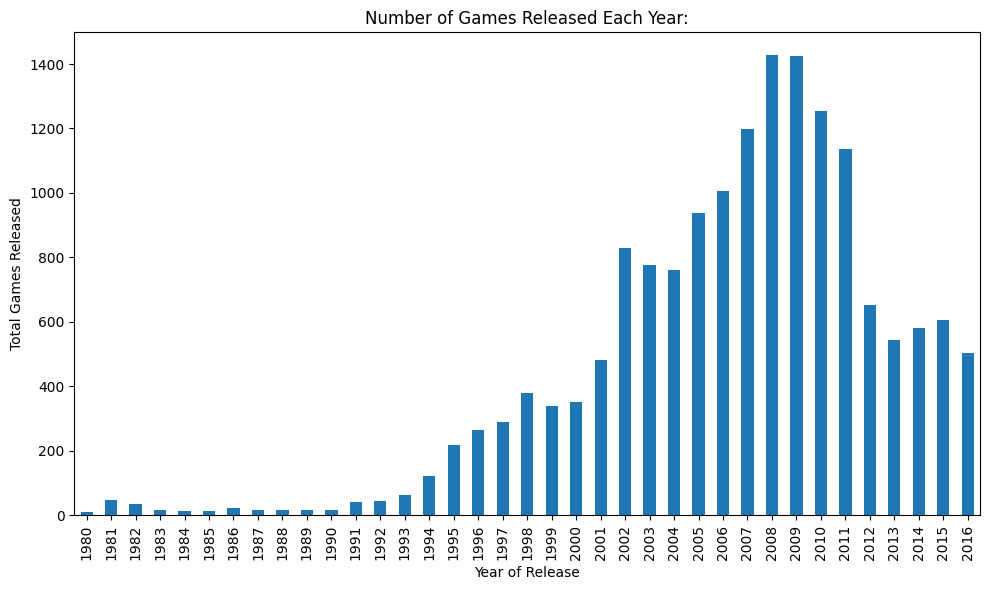

In [21]:
#Using '.groupby()' and 'count()' to see how many video games were released for each year
game_count = df_ice.groupby('year')['name'].count()
game_count.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Games Released Each Year:')
plt.xlabel('Year of Release')
plt.ylabel('Total Games Released')
plt.tight_layout()
plt.show()

<div style="background-color: #f8d7da; color: #721c24; padding: 15px; border-radius: 4px; border: 1px solid #f5c6cb;"> 

<b>Reviewer's comment v1:</b>

Could you please create a graph with this data?

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2:</b>
    
Looks great and also seems that there were almost no games before 1995.

</div>

In [22]:
#Creating a 'sales_by_platform' dataframe 
sales_by_platform = df_ice.groupby(['platform', 'year'])['total_sales'].sum().reset_index()
sales_by_platform.head(15)

,platform,year,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
5,2600,1985,0.45
6,2600,1986,0.67
7,2600,1987,1.94
8,2600,1988,0.74
9,2600,1989,0.63


In [23]:
#Checking the total sales for each platform 
total_sales_by_platform = sales_by_platform.groupby('platform')['total_sales'].sum()
total_sales_by_platform

platform
2600      86.48
3DO        0.10
3DS      257.81
DC        15.95
DS       802.78
GB       254.43
GBA      312.88
GC       196.73
GEN       30.77
GG         0.04
N64      218.01
NES      251.05
NG         1.44
PC       255.76
PCFX       0.03
PS       727.58
PS2     1233.56
PS3      931.34
PS4      314.14
PSP      289.53
PSV       53.81
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      891.18
WiiU      82.19
X360     961.24
XB       251.57
XOne     159.32
Name: total_sales, dtype: float64

In [24]:
total_sales_by_platform[total_sales_by_platform >= 100]

platform
3DS      257.81
DS       802.78
GB       254.43
GBA      312.88
GC       196.73
N64      218.01
NES      251.05
PC       255.76
PS       727.58
PS2     1233.56
PS3      931.34
PS4      314.14
PSP      289.53
SNES     200.04
Wii      891.18
X360     961.24
XB       251.57
XOne     159.32
Name: total_sales, dtype: float64

**NOTE:**
When observing the gross sales for each platform can say with confidence that not all platforms are relevant to our study and though there may be some useful data to be found in the less profitable platforms we are trying to determine what makes games successful and a huge part of that has to do with success of the platform. If a platform is successful and well liked it stands to reason the games released on that platform would also tend to be more successful. To make analysis easier and less time consuming only decided to look at the platforms with 100 million dollars or more in gross sales for the years they were distributed

In [25]:
sales_3DS = sales_by_platform[sales_by_platform['platform'] == '3DS']
sales_3DS

,platform,year,total_sales
12,3DS,2011,63.20
13,3DS,2012,51.36
14,3DS,2013,56.57
15,3DS,2014,43.76
16,3DS,2015,27.78
17,3DS,2016,15.14


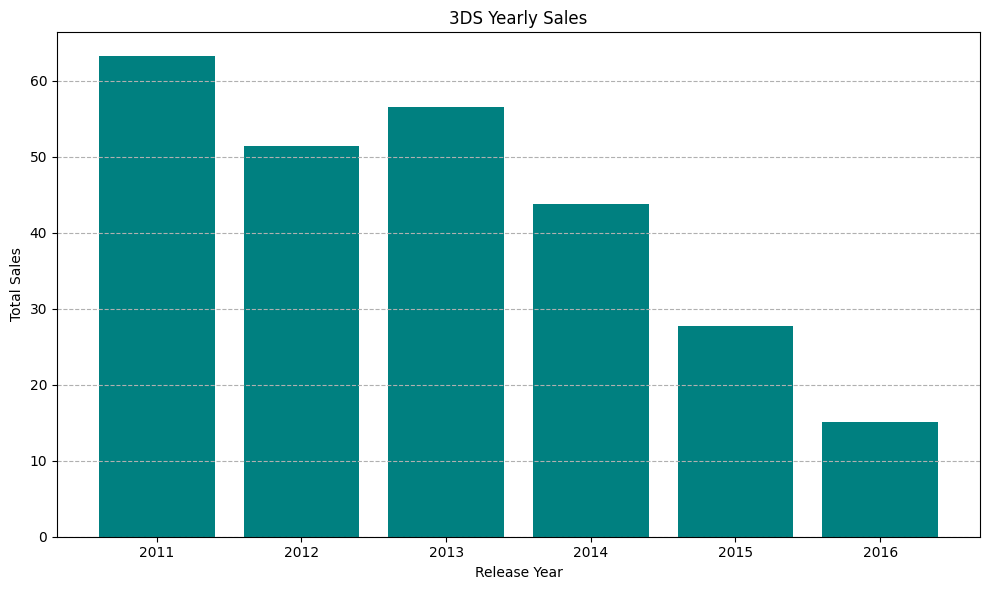

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(sales_3DS['year'], sales_3DS['total_sales'], color='teal')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('3DS Yearly Sales')
plt.xticks(sales_3DS['year'])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [27]:
sales_DS = sales_by_platform[sales_by_platform['platform'] == 'DS']
sales_DS

,platform,year,total_sales
25,DS,1985,0.02
26,DS,2004,17.27
27,DS,2005,130.14
28,DS,2006,119.81
29,DS,2007,146.94
30,DS,2008,145.31
31,DS,2009,119.54
32,DS,2010,85.02
33,DS,2011,26.18
34,DS,2012,11.01


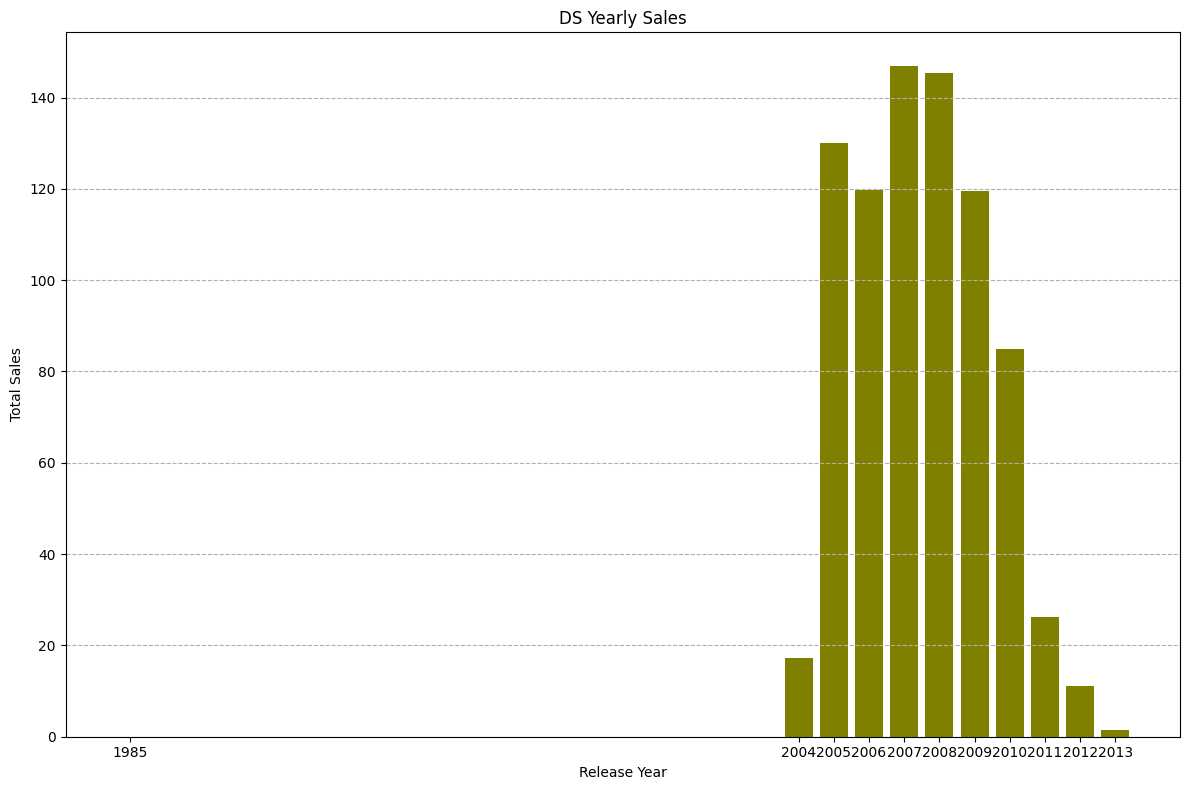

In [28]:
plt.figure(figsize=(12, 8))
plt.bar(sales_DS['year'], sales_DS['total_sales'], color='olive')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('DS Yearly Sales')
plt.xticks(sales_DS['year'])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [29]:
sales_gb = sales_by_platform[sales_by_platform['platform'] == 'GB']
sales_gb

,platform,year,total_sales
36,GB,1988,1.43
37,GB,1989,64.97
38,GB,1990,4.89
39,GB,1991,5.57
40,GB,1992,25.49
41,GB,1994,12.18
42,GB,1995,3.60
43,GB,1996,36.03
44,GB,1997,6.37
45,GB,1998,26.90


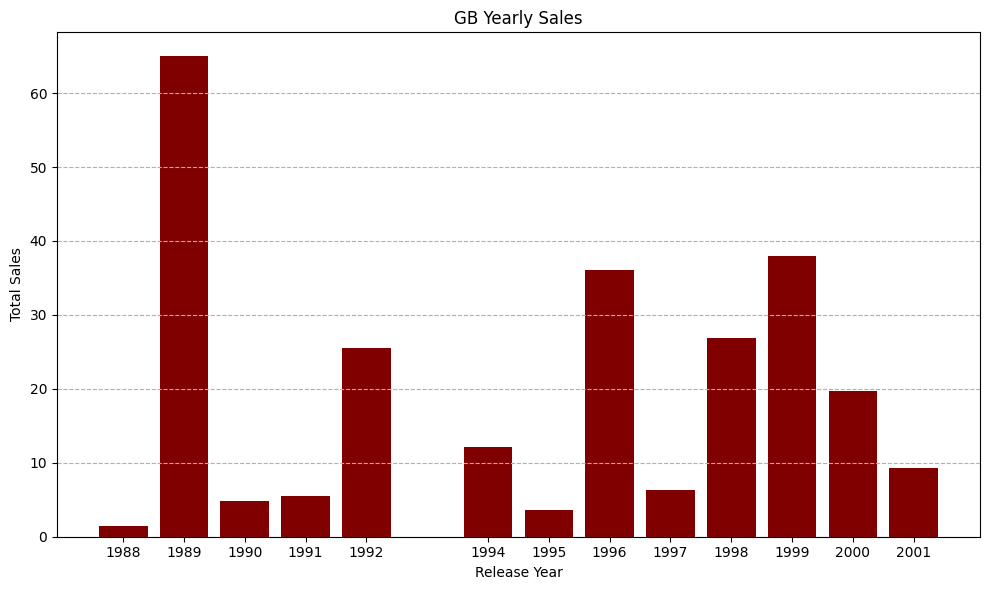

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(sales_gb['year'], sales_gb['total_sales'], color='maroon')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('GB Yearly Sales')
plt.xticks(sales_gb['year'])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [31]:
sales_gba = sales_by_platform[sales_by_platform['platform'] == 'GBA']
sales_gba

,platform,year,total_sales
49,GBA,2000,0.07
50,GBA,2001,61.53
51,GBA,2002,74.16
52,GBA,2003,56.67
53,GBA,2004,77.91
54,GBA,2005,33.86
55,GBA,2006,5.28
56,GBA,2007,3.40


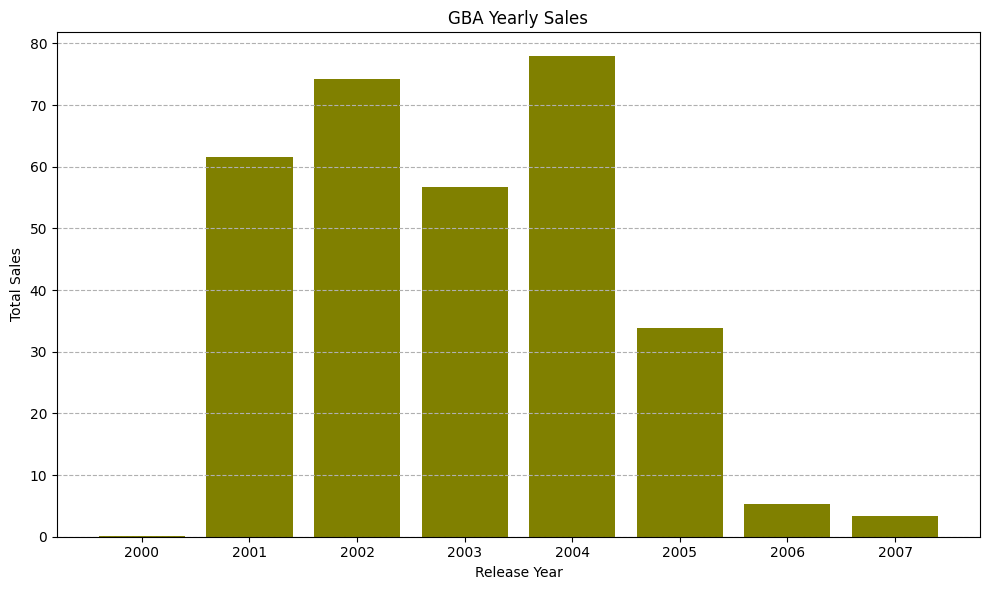

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(sales_gba['year'], sales_gba['total_sales'], color='olive')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('GBA Yearly Sales')
plt.xticks(sales_gba['year'])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [33]:
sales_gc = sales_by_platform[sales_by_platform['platform'] == 'GC']
sales_gc

,platform,year,total_sales
57,GC,2001,26.34
58,GC,2002,51.81
59,GC,2003,50.61
60,GC,2004,28.82
61,GC,2005,27.62
62,GC,2006,11.26
63,GC,2007,0.27


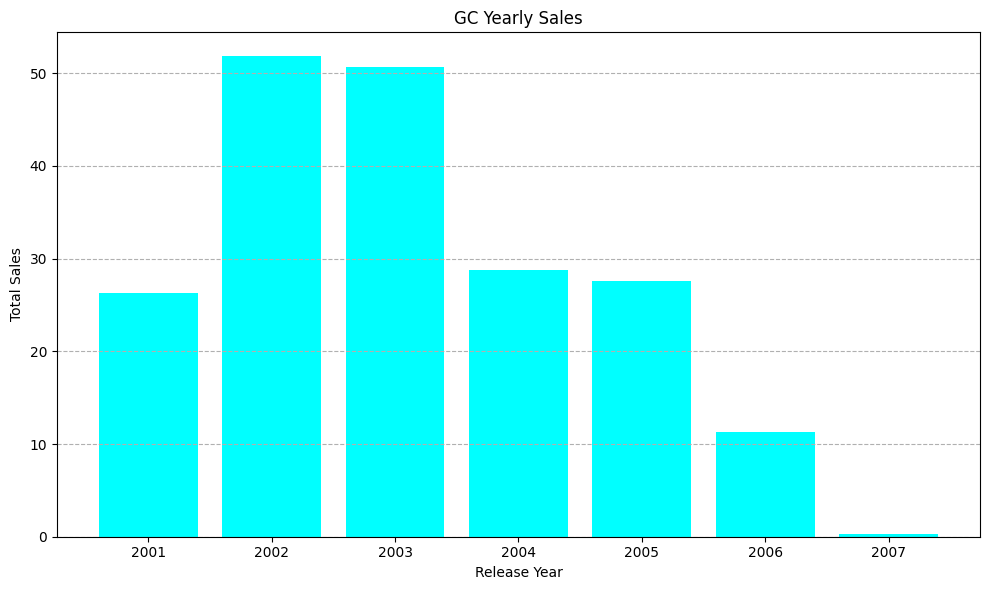

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(sales_gc['year'], sales_gc['total_sales'], color='cyan')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('GC Yearly Sales')
plt.xticks(sales_gc['year'])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [35]:
sales_N64 = sales_by_platform[sales_by_platform['platform'] == 'N64']
sales_N64

,platform,year,total_sales
70,N64,1996,34.10
71,N64,1997,39.50
72,N64,1998,49.24
73,N64,1999,57.87
74,N64,2000,33.97
75,N64,2001,3.25
76,N64,2002,0.08


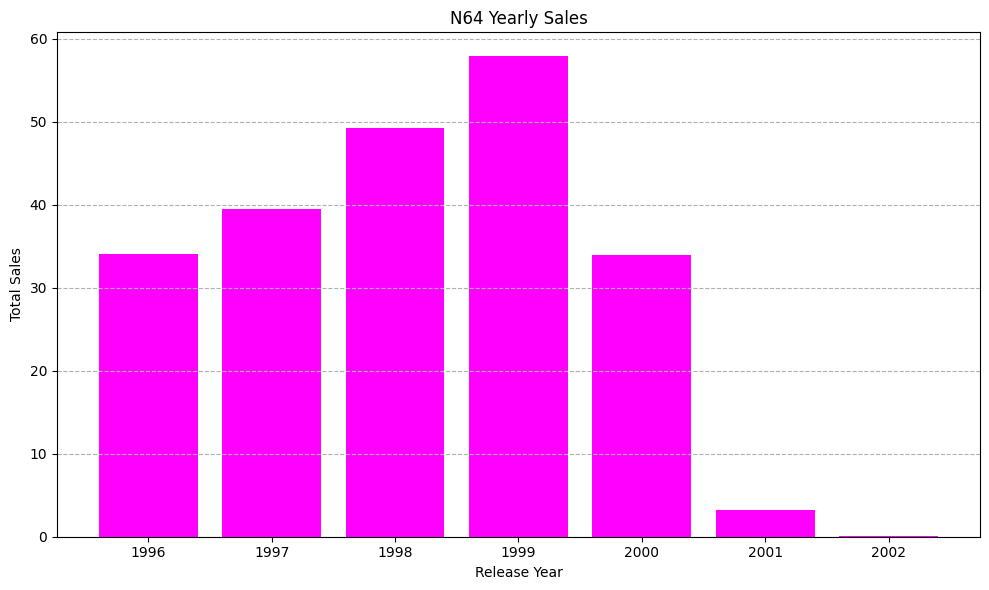

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(sales_N64['year'], sales_N64['total_sales'], color='magenta')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('N64 Yearly Sales')
plt.xticks(sales_N64['year'])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [37]:
sales_pc = sales_by_platform[sales_by_platform['platform'] == 'PC']
sales_pc

,platform,year,total_sales
93,PC,1985,0.04
94,PC,1988,0.03
95,PC,1992,3.03
96,PC,1994,12.87
97,PC,1995,4.22
98,PC,1996,10.58
99,PC,1997,11.27
100,PC,1998,3.26
101,PC,1999,4.74
102,PC,2000,4.66


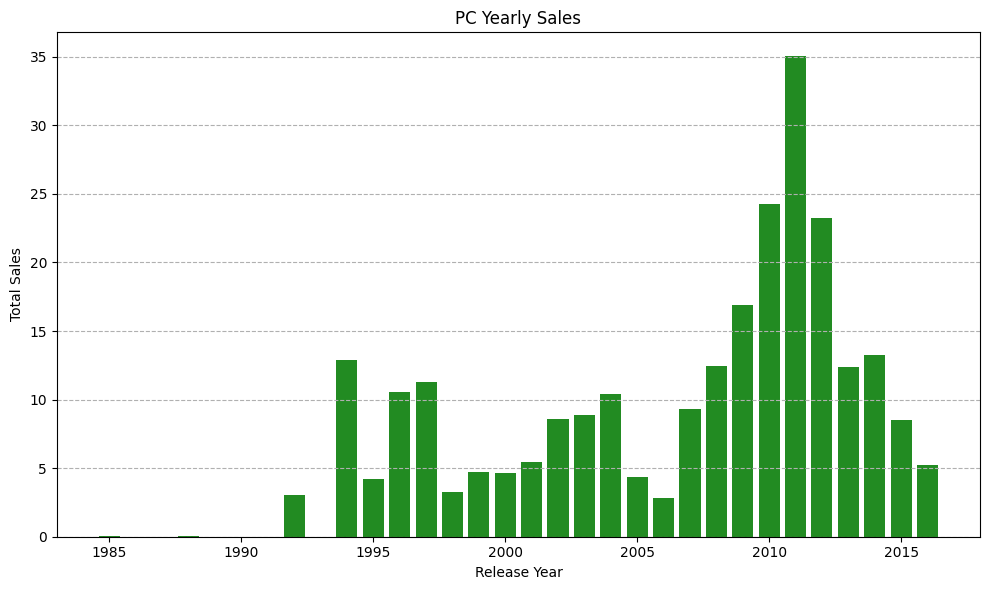

In [38]:
plt.figure(figsize=(10, 6))
plt.bar(sales_pc['year'], sales_pc['total_sales'], color='forestgreen')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('PC Yearly Sales')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


In [39]:
sales_ps = sales_by_platform[sales_by_platform['platform'] == 'PS']
sales_ps

,platform,year,total_sales
120,PS,1994,6.03
121,PS,1995,35.96
122,PS,1996,94.70
123,PS,1997,136.17
124,PS,1998,169.49
125,PS,1999,144.53
126,PS,2000,96.37
127,PS,2001,35.59
128,PS,2002,6.67
129,PS,2003,2.07


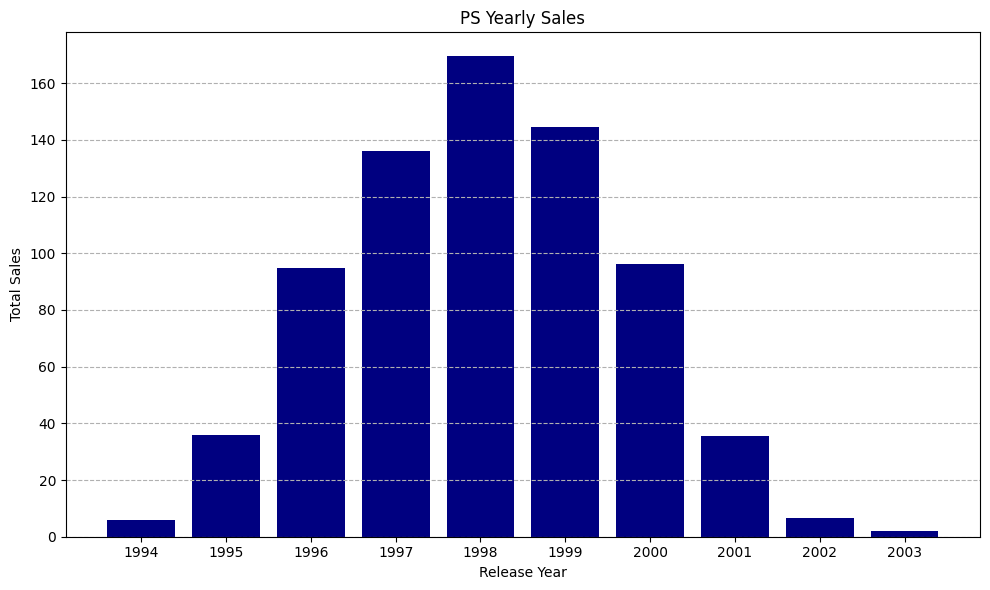

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(sales_ps['year'], sales_ps['total_sales'], color='navy')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('PS Yearly Sales')
plt.xticks(sales_ps['year'])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [41]:
sales_PS2 = sales_by_platform[sales_by_platform['platform'] == 'PS2']
sales_PS2

,platform,year,total_sales
130,PS2,2000,39.17
131,PS2,2001,166.43
132,PS2,2002,205.38
133,PS2,2003,184.31
134,PS2,2004,211.81
135,PS2,2005,160.66
136,PS2,2006,103.42
137,PS2,2007,75.99
138,PS2,2008,53.90
139,PS2,2009,26.40


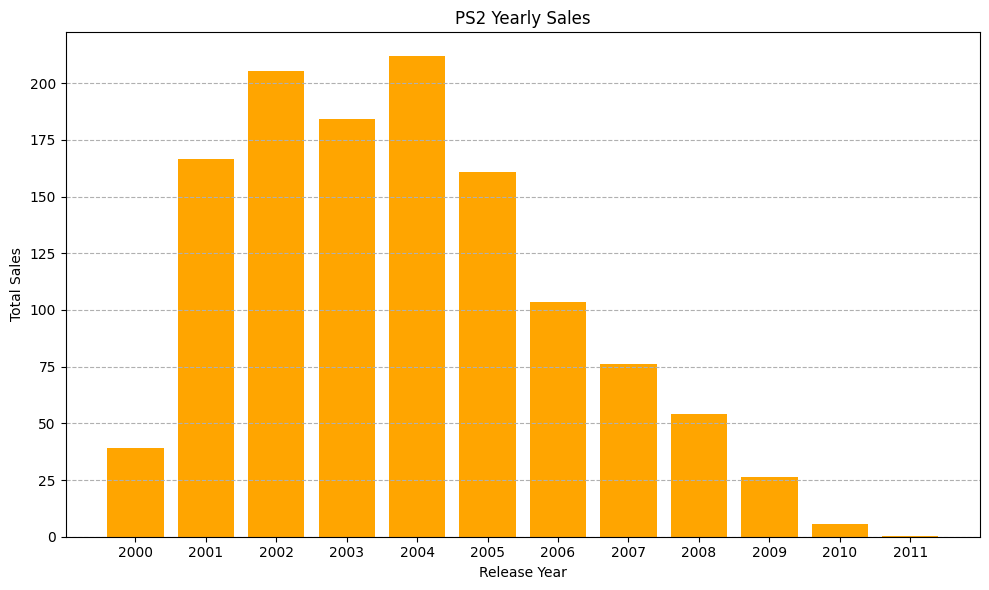

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(sales_PS2['year'], sales_PS2['total_sales'], color='orange')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('PS2 Yearly Sales')
plt.xticks(sales_PS2['year'])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [43]:
sales_PS3 = sales_by_platform[sales_by_platform['platform'] == 'PS3']
sales_PS3

,platform,year,total_sales
142,PS3,2006,20.96
143,PS3,2007,73.19
144,PS3,2008,118.52
145,PS3,2009,130.93
146,PS3,2010,142.17
147,PS3,2011,156.78
148,PS3,2012,107.36
149,PS3,2013,113.25
150,PS3,2014,47.76
151,PS3,2015,16.82


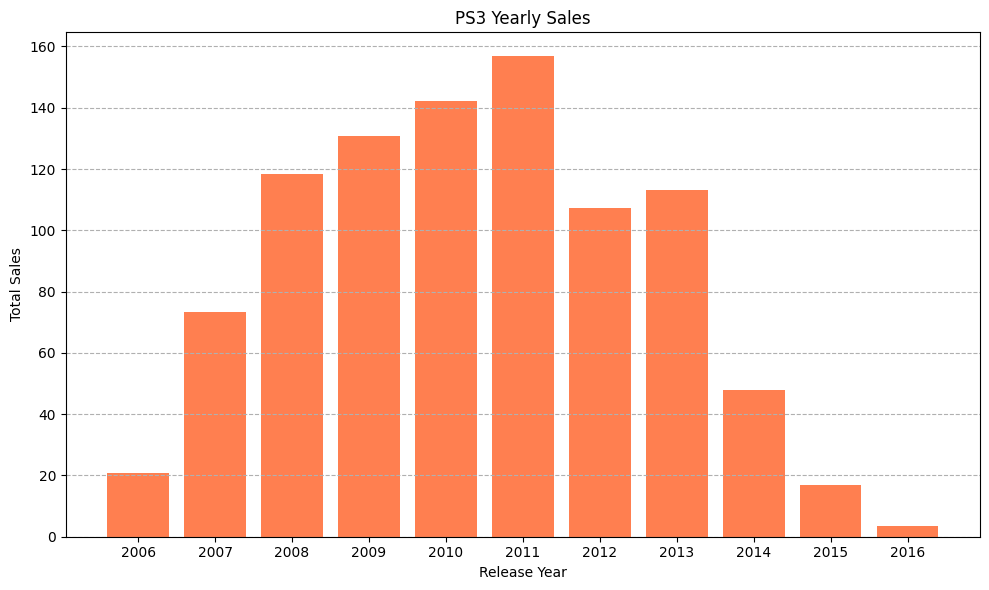

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(sales_PS3['year'], sales_PS3['total_sales'], color='coral')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('PS3 Yearly Sales')
plt.xticks(sales_PS3['year'])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [45]:
sales_PS4 = sales_by_platform[sales_by_platform['platform'] == 'PS4']
sales_PS4

,platform,year,total_sales
153,PS4,2013,25.99
154,PS4,2014,100.00
155,PS4,2015,118.90
156,PS4,2016,69.25


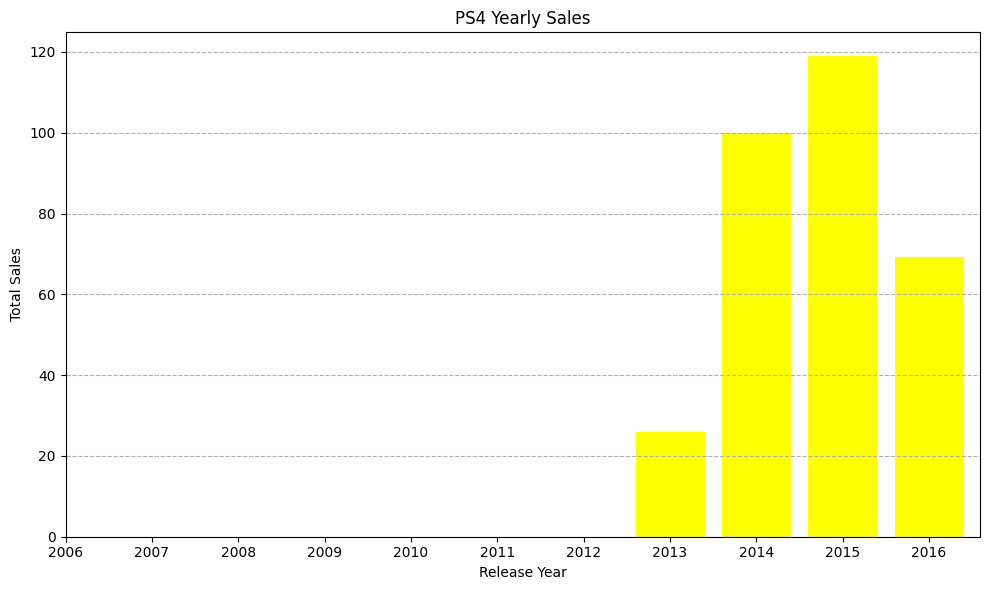

In [46]:
plt.figure(figsize=(10, 6))
plt.bar(sales_PS4['year'], sales_PS4['total_sales'], color='yellow')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('PS4 Yearly Sales')
plt.xticks(sales_PS3['year'])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [47]:
sales_psp = sales_by_platform[sales_by_platform['platform'] == 'PSP']
sales_psp

,platform,year,total_sales
157,PSP,2004,7.06
158,PSP,2005,43.84
159,PSP,2006,55.32
160,PSP,2007,46.93
161,PSP,2008,34.55
162,PSP,2009,37.78
163,PSP,2010,35.04
164,PSP,2011,17.82
165,PSP,2012,7.69
166,PSP,2013,3.14


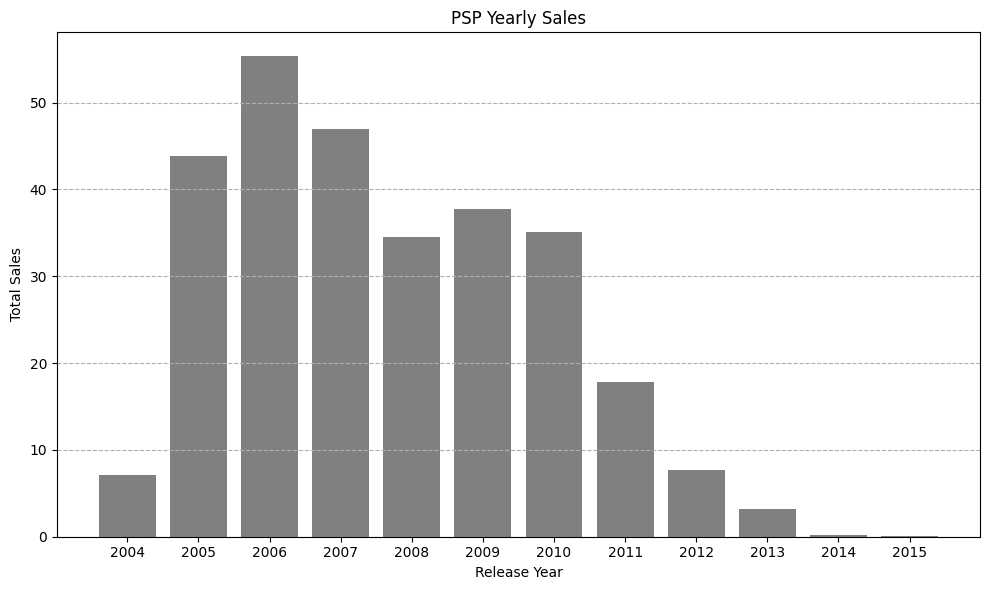

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(sales_psp['year'], sales_psp['total_sales'], color='gray')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('PSP Yearly Sales')
plt.xticks(sales_psp['year'])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [49]:
sales_snes = sales_by_platform[sales_by_platform['platform'] == 'SNES']
sales_snes 

,platform,year,total_sales
183,SNES,1990,26.15
184,SNES,1991,16.22
185,SNES,1992,32.98
186,SNES,1993,40.02
187,SNES,1994,35.08
188,SNES,1995,32.20
189,SNES,1996,15.92
190,SNES,1997,0.99
191,SNES,1998,0.22
192,SNES,1999,0.26


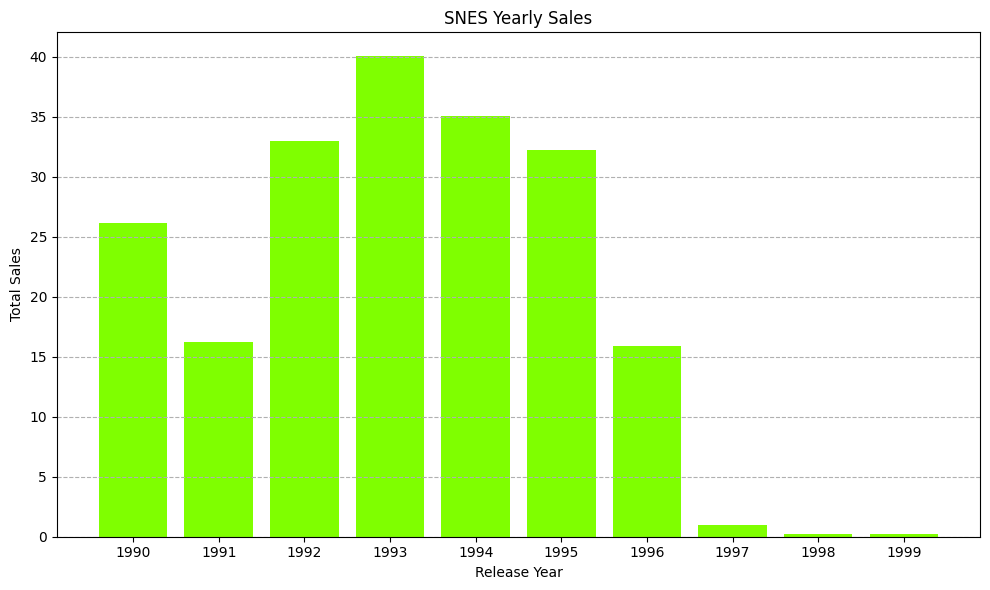

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(sales_snes ['year'], sales_snes['total_sales'], color='chartreuse')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('SNES Yearly Sales')
plt.xticks(sales_snes ['year'])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [51]:
sales_wii = sales_by_platform[sales_by_platform['platform'] == 'Wii']
sales_wii

,platform,year,total_sales
197,Wii,2006,137.15
198,Wii,2007,152.77
199,Wii,2008,171.32
200,Wii,2009,206.97
201,Wii,2010,127.95
202,Wii,2011,59.65
203,Wii,2012,21.71
204,Wii,2013,8.59
205,Wii,2014,3.75
206,Wii,2015,1.14


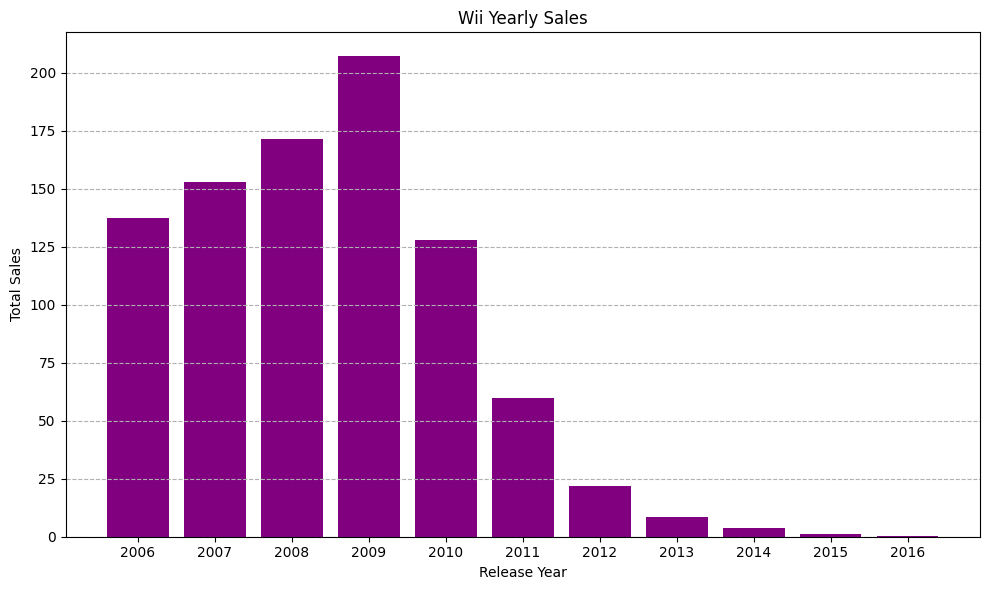

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(sales_wii ['year'], sales_wii['total_sales'], color='purple')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('Wii Yearly Sales')
plt.xticks(sales_wii['year'])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [53]:
sales_x360 = sales_by_platform[sales_by_platform['platform'] == 'X360']
sales_x360 

,platform,year,total_sales
213,X360,2005,8.25
214,X360,2006,51.62
215,X360,2007,95.41
216,X360,2008,135.26
217,X360,2009,120.29
218,X360,2010,170.03
219,X360,2011,143.84
220,X360,2012,99.74
221,X360,2013,88.58
222,X360,2014,34.74


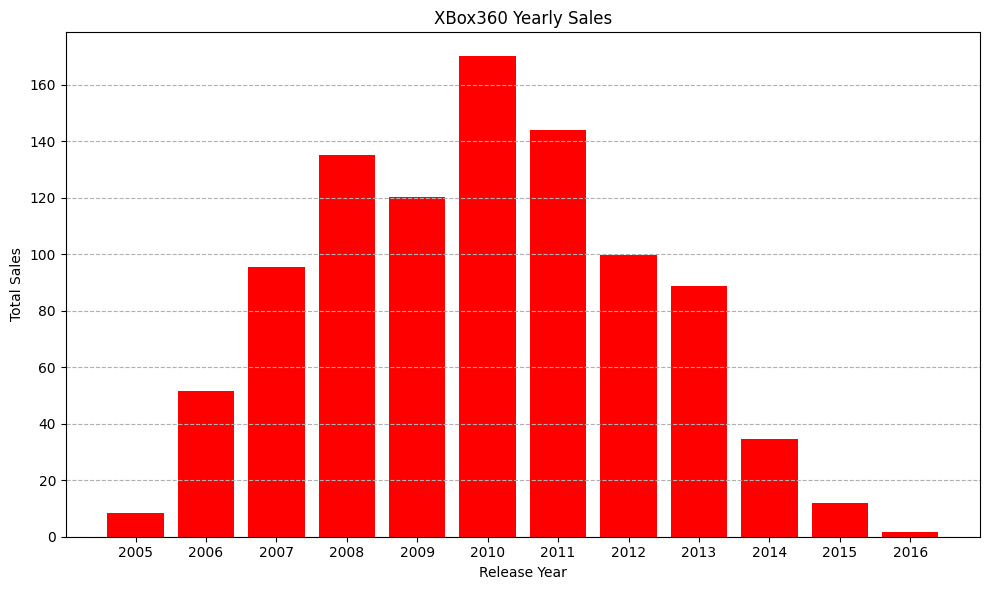

In [54]:
plt.figure(figsize=(10, 6))
plt.bar(sales_x360['year'], sales_x360 ['total_sales'], color='red')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('XBox360 Yearly Sales')
plt.xticks(sales_x360['year'])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [55]:
sales_xb = sales_by_platform[sales_by_platform['platform'] == 'XB']
sales_xb

,platform,year,total_sales
225,XB,2000,0.99
226,XB,2001,22.26
227,XB,2002,48.01
228,XB,2003,55.04
229,XB,2004,65.42
230,XB,2005,49.08
231,XB,2006,10.04
232,XB,2007,0.55
233,XB,2008,0.18


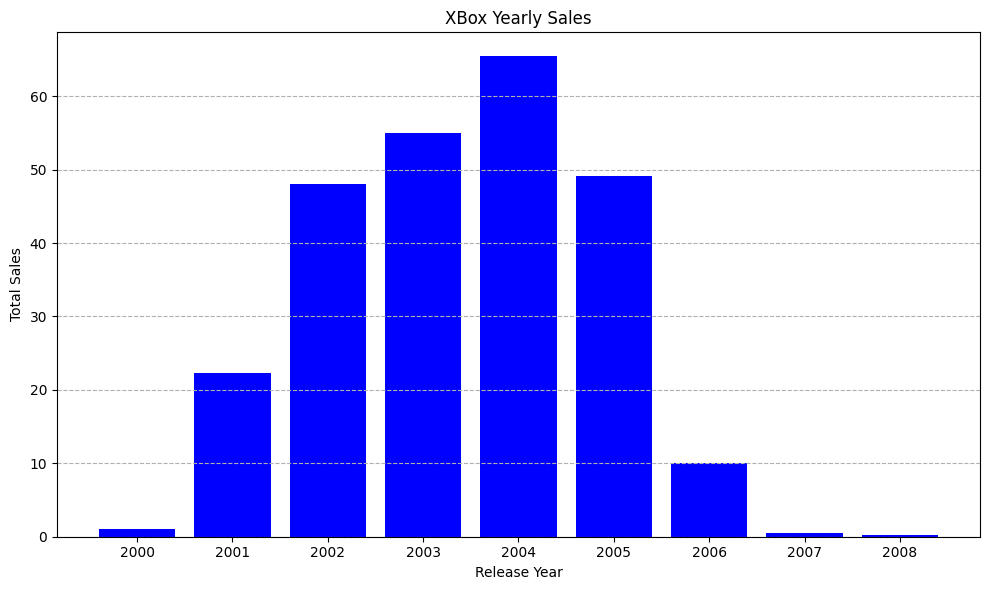

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(sales_xb['year'], sales_xb['total_sales'], color='blue')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('XBox Yearly Sales')
plt.xticks(sales_xb['year'])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [57]:
sales_xone = sales_by_platform[sales_by_platform['platform'] == 'XOne']
sales_xone

,platform,year,total_sales
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14
237,XOne,2016,26.15


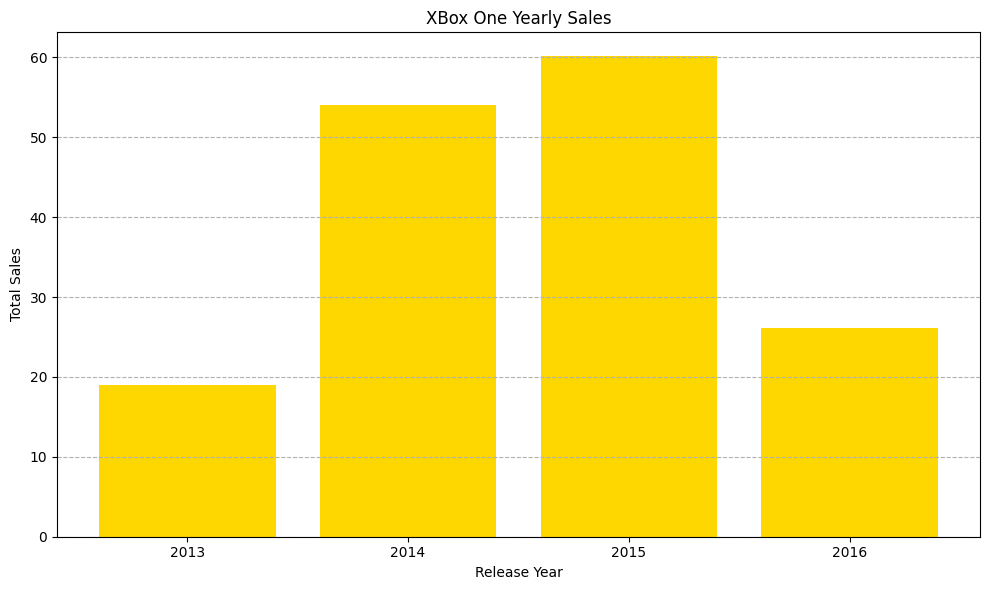

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(sales_xone['year'], sales_xone['total_sales'], color='gold')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('XBox One Yearly Sales')
plt.xticks(sales_xone['year'])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

<div style="background-color: #fff3cd; color: #856404; padding: 15px; border-radius: 4px; border: 1px solid #ffeeba;">
    
<b>Reviewer's comment v1:</b>

You could create a function to plot these graphs, or use a for loop to run your code for multiple cases. This will make your analysis more efficient and help avoid repeating similar code.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
That is a nice way to check platform life cycle. We can see that only a small subset of platform still has sales.

**NOTE:** 
Created new dataframe for the potential platforms (those exceeding 100 million in sales) and also created bar graphs for each to show the distribution of sales for the platforms lifetime. This gives valueable insight into the length of time various platforms are successful.

### Data Analysis Conclusions: ###
The typical life cycle for a platform can be defined in multiple phases an introductory phase where the initial hype and marketing for the platform is at it's highest, a phase of growth typically in years 2-4 where the user base rapidly increases, maturity where the platform has a large stable base but is not seeing as rapid growth, a decline usually because it is near to the release of a newer platform (e.g. PS3 to PS4) or simply because there is less support for the platform. Although there are a great deal of platforms that exceeded the initial criteria we set of 100 million dollars or more. In order to be considered "irrelevant" the platform needs to have fewer than 5 million dollars in sales or if they were discontinued before 2016, our cut off year for analysis. The platforms that were either discontinued prior to 2016 or fall short of the 5 million dollar profit margin include the Game Boy (GB), Game Boy Advanced (GBA), Game Cube (GC), Nintendo 64, Play Staystion Portable (PSP), Super Nintendo Entertainment System (SNES) and the Nintendo Wii all of these companies have gone through the platform life cycle since their inception. The time of relevancy for these platforms range from 4-11 years and shows that as of 2016 the majority of handheld devices like the PSP have sharply declined. The biggest contributor to the decline of platforms is technology and it's evolution and subsequent iterations of the same platform (such as in the case of of PlayStation) cause certain platforms to fade and new ones to rise. In this case the window of years before the new and updated version of a console comes out ranges from 8-11 years, meaning that technology and competition tend to drive advancements for these platforms for example XBox and PlayStation release updated consoles around the same time and usually have similar capabilities. These platforms usually only have a few years of overlap such as with the PS3 and PS4, as the updated version typically becomes preferred among users. The companies that have been chosen for analysis are the platforms that are still widely distributed in 2016 as this will be the greatest aid in our analysis and projecting potential sales/profitability for 2017. This means the only truly 'relevant' platforms as of 2016 are the PS4, the XBOX One, PC and the 3DS. PC may be considered an outlier as this is a platform that has remained inconsistently popular since the 90s and spans across multiple companies, platforms and game genres. Given our search is about building a prognosis for 2017, we'll take data from 2013-2016 when PS4 and XBOX One were first released and the last few years before 2017 the 3DS and PC were distributed prior to 2017, these are the most likely platforms to be profitable going forward and we'll work exclusively with these from here on in. 

**Note:** 
Created a new dataframe with the the relevant platforms to our analysis, 'rel_platforms' to ensure easier analysis and less confusion down the line.

In [59]:
#Filtered the dataframe and kept only the relevant information
rel_platforms = df_ice[df_ice['platform'].isin(['3DS', 'PC', 'PS4', 'XOne'])]
rel_platforms

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
31,Call of Duty: Black Ops 3,PS4,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,Unknown,2015,14.63
33,Pokemon X/Pokemon Y,3DS,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,Unknown,2013,14.60
40,Mario Kart 7,3DS,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,2011,12.65
42,Grand Theft Auto V,PS4,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,2014,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,Unknown,2014,11.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16690,Pony Friends 2,PC,Simulation,0.00,0.01,0.00,0.00,0.0,0.0,Unknown,2009,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,2014,0.01
16696,Breach,PC,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,2011,0.01
16702,STORM: Frontline Nation,PC,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,2011,0.01


<div style="background-color: #f8d7da; color: #721c24; padding: 15px; border-radius: 4px; border: 1px solid #f5c6cb;">

<b>Reviewer's comment v1:</b>
    
Based on your analysis, could you please define the platform life cycle?  Once you have defined the life cycle, please filter your original data to keep only the most recent or currently active platform. Then, perform further analysis using this filtered DataFrame. This approach will help focus your analysis on the latest platform and provide more relevant insights for your project.

<div style="background-color: #fff3cd; color: #856404; padding: 15px; border-radius: 4px; border: 1px solid #ffeeba;">

<b>Reviewer's comment v2:</b>

    
You did a great job finding the platform lifespan. 
    
However, for the further invesigation it is uncommon to use data for more than 2-3 years when forecasting next year's sales, even in case of traditional businesses. And in the dynamic computer games industry, taking longer time intervals should be avoided as it will definitely lead to tracking some obsolete trends. But you shouldn't take too short a period either.
    
Here I can advice checking 2014-2016 / 2013-2016 to evaluate only latest data. 


## Boxplot Showing Sales of Chosen Platforms:

In [60]:
#Created new dataframe containing all the relevant info
new_sales_pc = sales_pc.query('year in [2013, 2014, 2015, 2016]')
new_sales_3DS = sales_3DS.query('year in [2013, 2014, 2015, 2016]')

In [61]:
sales_for_rel_platforms = pd.concat([new_sales_pc, new_sales_3DS, sales_xone, sales_PS4], axis=0, join='outer')
sales_for_rel_platforms 

,platform,year,total_sales
115,PC,2013,12.38
116,PC,2014,13.28
117,PC,2015,8.52
118,PC,2016,5.25
14,3DS,2013,56.57
15,3DS,2014,43.76
16,3DS,2015,27.78
17,3DS,2016,15.14
234,XOne,2013,18.96
235,XOne,2014,54.07


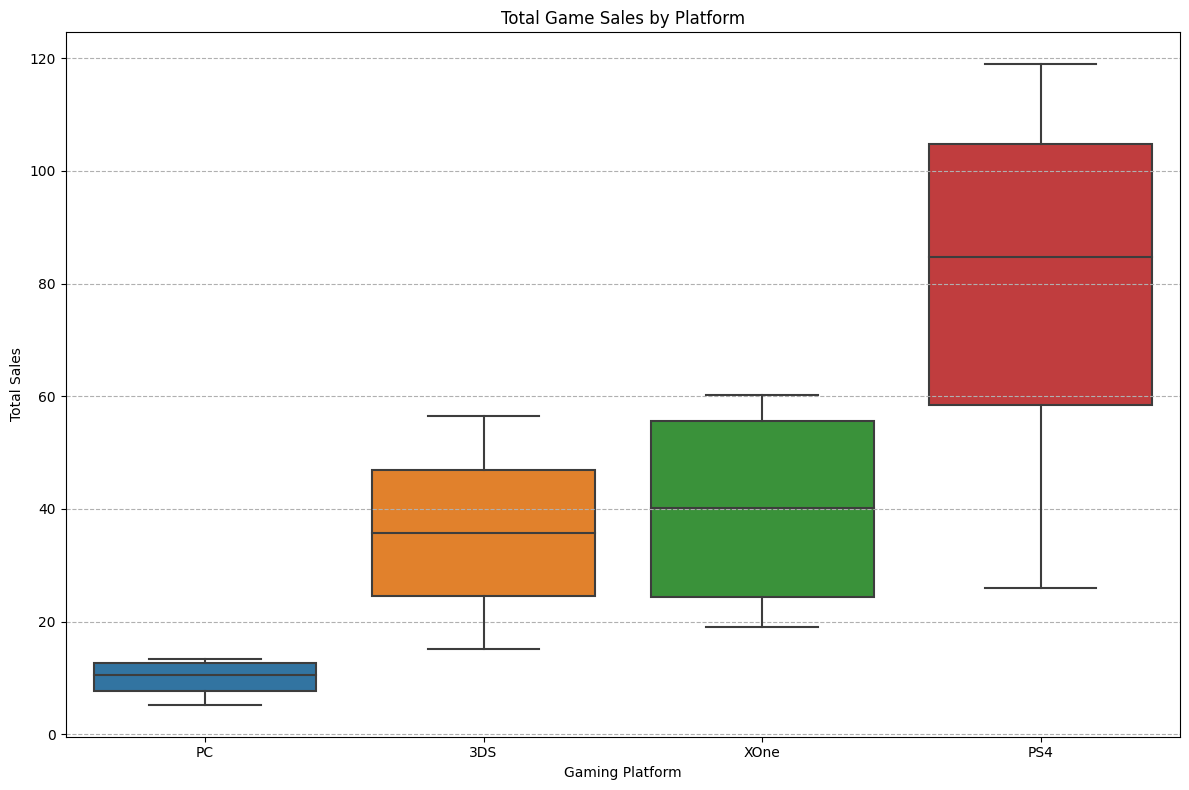

In [62]:
#Created boxplot to show the spread of sales for the relevant platforms
plt.figure(figsize=(12, 8))
sns.boxplot(data=sales_for_rel_platforms, x='platform', y='total_sales')
plt.title('Total Game Sales by Platform')
plt.xlabel('Gaming Platform')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### Box Plot Conclusions: ###
As indicated by the box plot there is quite a big difference in the span of revenue from the most profitable to least profitable platforms. Out of our chosen platforms that met the previous criteria mentioned before PC was the least profitable platform with a maximum annual sales amount around 13 million dollars worldwide (2014) and had the smallest spread in terms of minimum and maximum values. PlayStation 4 on the other hand was the most profitable in terms of most profitable annually with their maximum profit of near 120 million dollars in 2015 and had the highest minimum sales of around 26 million dollars. Meaning in the years 2013-2016 the worst year PlayStation had still outsold the best year for PC games. The 3DS and XBOX One are closer together in terms of general sales and spread with the XBOX One's best year being only slightly more profitable during those years. The averages for each range from 9 million for PC gaming and 66 million for the PS4, with the 3DS and the XBOX One both being between 30 and 40 million. 

## Scatterplots Showing Correlation Between Reviews and Sales: ##

In [63]:
#Created a new dataframe 'pc_sales_reviews' with all the relevant info including 'user_score' and 'critic_score'
pc_sales_reviews = rel_platforms[rel_platforms['platform'] == 'PC']
pc_sales_reviews = pc_sales_reviews[pc_sales_reviews['user_score'] > 0]
pc_sales_reviews = pc_sales_reviews[pc_sales_reviews['critic_score'] > 0]
pc_sales_reviews = pc_sales_reviews.drop(['name', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'rating'], axis=1)
pc_sales_reviews

,platform,critic_score,user_score,year,total_sales
85,PC,86.0,7.6,2009,8.01
138,PC,93.0,7.3,2004,6.29
192,PC,88.0,4.0,2012,5.14
218,PC,93.0,8.2,2010,4.83
284,PC,96.0,9.1,1997,4.12
...,...,...,...,...,...
16640,PC,51.0,3.8,2007,0.01
16692,PC,80.0,7.6,2014,0.01
16696,PC,61.0,5.8,2011,0.01
16702,PC,60.0,7.2,2011,0.01


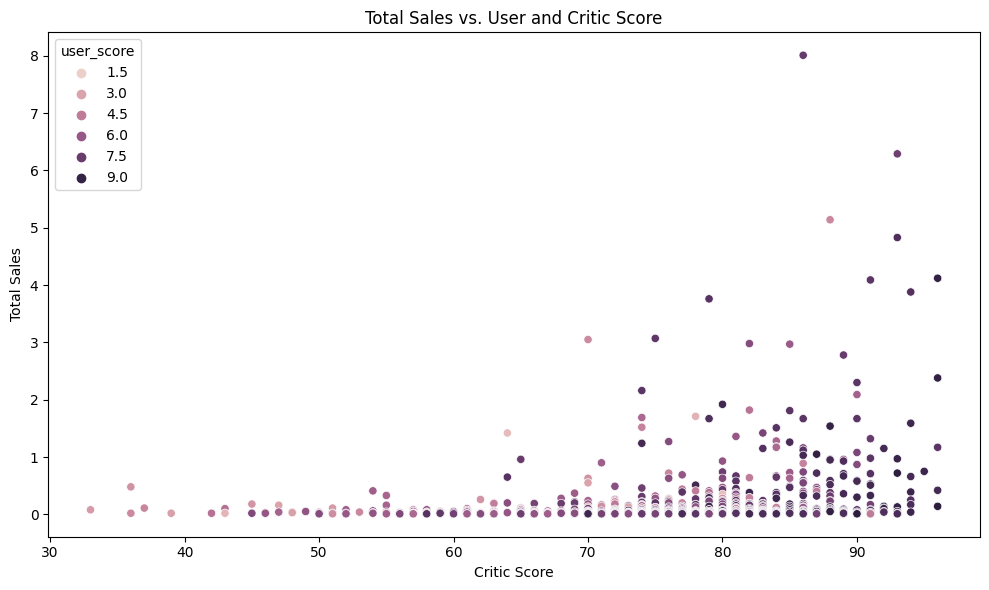

In [64]:
#Created a scatterplot showing how the 'user_score' and 'critic_score' influence sales for PC.
plt.figure(figsize=(10,6))
sns.scatterplot(x='critic_score', y='total_sales', hue='user_score', data=pc_sales_reviews)
plt.title('Total Sales vs. User and Critic Score')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.tight_layout()

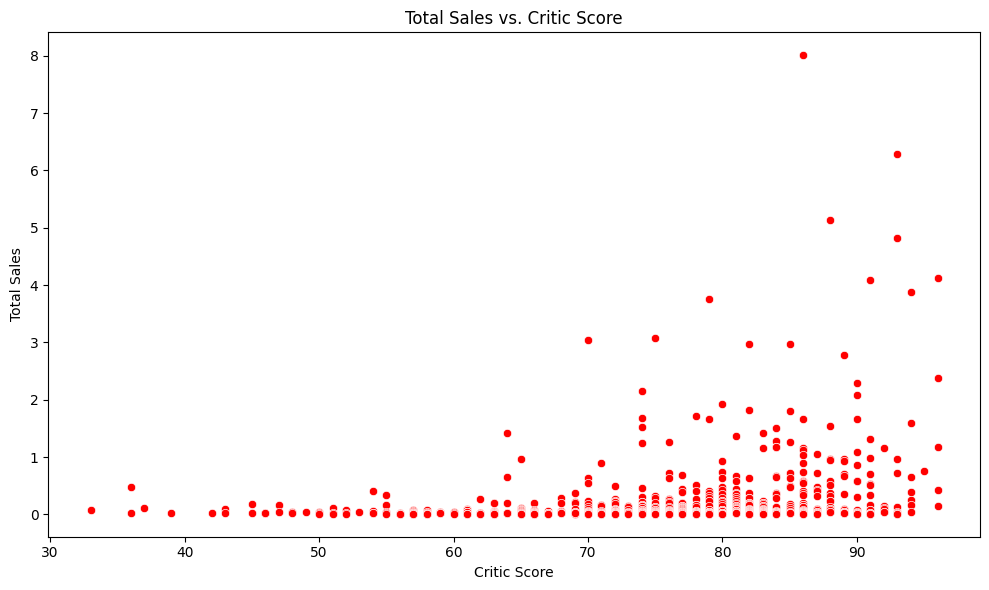

In [65]:
#Created another scatteplot just showing 'critic_score' and it's affect on sales 
plt.figure(figsize=(10,6))
sns.scatterplot(x='critic_score', y='total_sales', color='red', data=pc_sales_reviews)
plt.title('Total Sales vs. Critic Score')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.tight_layout()

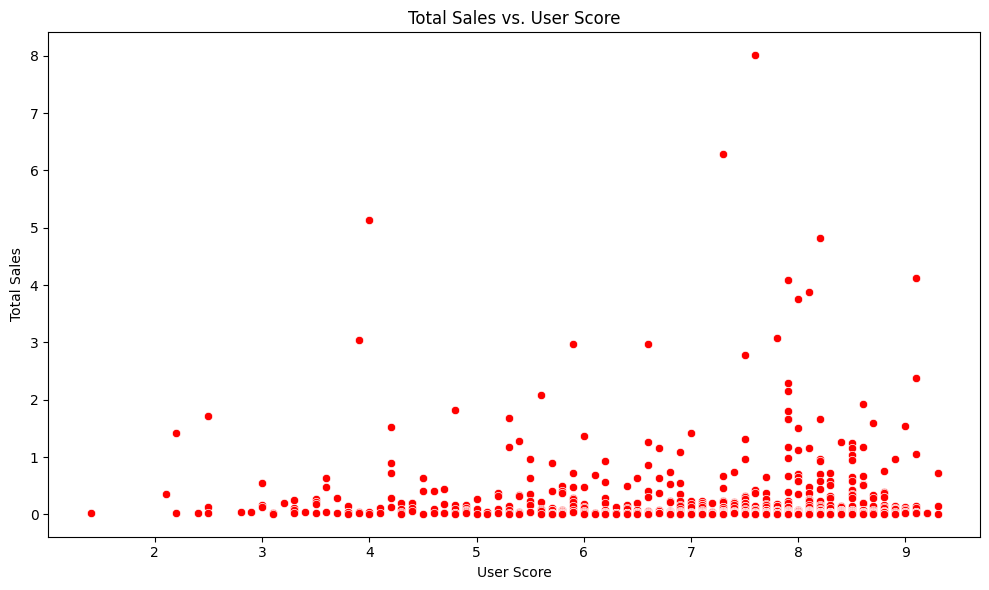

In [66]:
#Created another scatterplot just showing 'user_score' and it's affect on sales 
plt.figure(figsize=(10,6))
sns.scatterplot(x='user_score', y='total_sales', color='red', data=pc_sales_reviews)
plt.title('Total Sales vs. User Score')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.tight_layout()

### Conclusions on Effect of Reviews on Sales for PC: ###
**Note:**
In all of the scatterplots created excluded reviews that were 0 as this is the value we used for the missing values and including them would create outliers in the data that could skew the results. With that in mind it is evident that the lower the review for both user and professional critics typically the performance is worse. The majority of the sales in the case of the reviews for critics are distributed between the 70-90 / 100 range. The user ratings and sales are more spread with games rated 6 - 10 out of 10 bringing in the majority of the revenue across the PC platform. 

In [67]:
#Created new dataframe 'platforms_w_reviews' for the other chosen platforms and 'user_score', 'critic_score'
filtered_platforms = ['XOne', 'PS4', '3DS']
platforms_w_reviews = rel_platforms[rel_platforms['platform'].isin(filtered_platforms)]
platforms_w_reviews = platforms_w_reviews[platforms_w_reviews['user_score'] > 0]
platforms_w_reviews = platforms_w_reviews[platforms_w_reviews['critic_score'] > 0]
platforms_w_reviews = platforms_w_reviews.drop(['name', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'rating'], axis=1)
platforms_w_reviews

,platform,critic_score,user_score,year,total_sales
40,3DS,85.0,8.2,2011,12.65
42,PS4,97.0,8.3,2014,12.62
53,3DS,90.0,8.4,2011,10.81
62,3DS,78.0,7.2,2012,9.90
73,3DS,88.0,8.7,2012,9.17
...,...,...,...,...,...
16526,PS4,61.0,7.9,2016,0.01
16530,PS4,51.0,5.5,2016,0.01
16597,XOne,65.0,6.0,2015,0.01
16630,XOne,63.0,8.2,2016,0.01


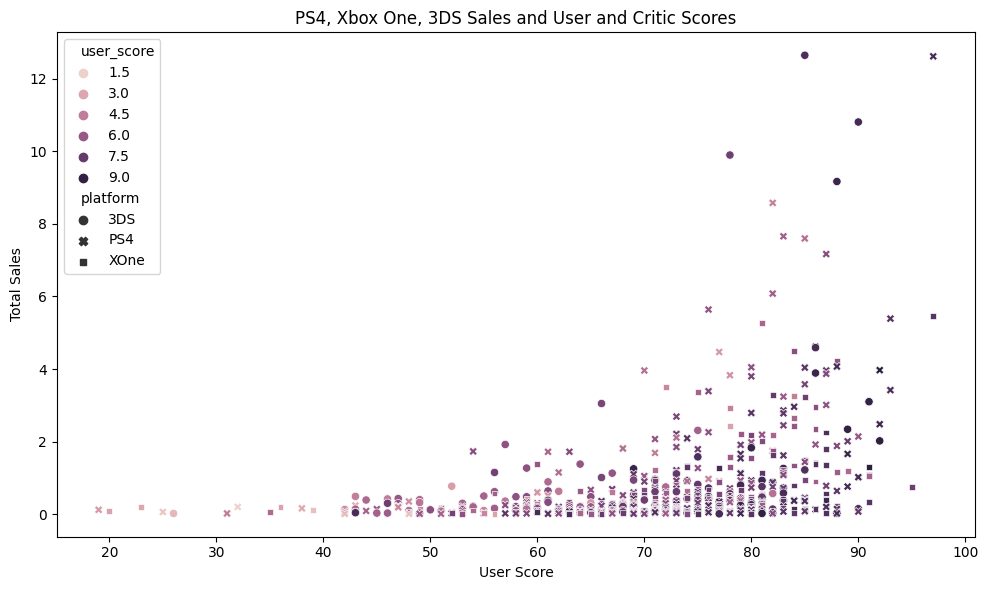

In [68]:
#Created a new scatterplot showing the same relationship with the other chosen platforms to compare to PC.
plt.figure(figsize=(10,6))
sns.scatterplot(x='critic_score', y='total_sales', hue='user_score', style='platform', data=platforms_w_reviews )
plt.title('PS4, Xbox One, 3DS Sales and User and Critic Scores')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.tight_layout()

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>

Well done! Very nice scatter plots.


### Conclusions between PC and Other Selected Platform Sales and Reviews: ###
The total sales for the other 3 platforms typically follow the same pattern with the majority of the sales being between 70-100/100 even though no games seem to have received a perfect score. Seemingly given all the scatterplots the critics score tends to be more influential in the overall sales of games, although the critic and user score may differ drastically the games that are sold the most typically are in the top 30% of games according to critics. With the removal of the missing values marked as 0 there is nothing to skew the data negatively and we can see that the lower reviewed the games typically total fewer in sales than higher rated games.

In [69]:
#Grouped by 'genre' and 'total_sales' to get total sales by genre
genre_sales = rel_platforms.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()
genre_sales

,genre,total_sales
0,Action,221.96
1,Shooter,194.01
2,Role-Playing,170.99
3,Sports,100.47
4,Simulation,81.39
5,Strategy,48.83
6,Platform,41.61
7,Racing,40.58
8,Misc,35.01
9,Adventure,23.87


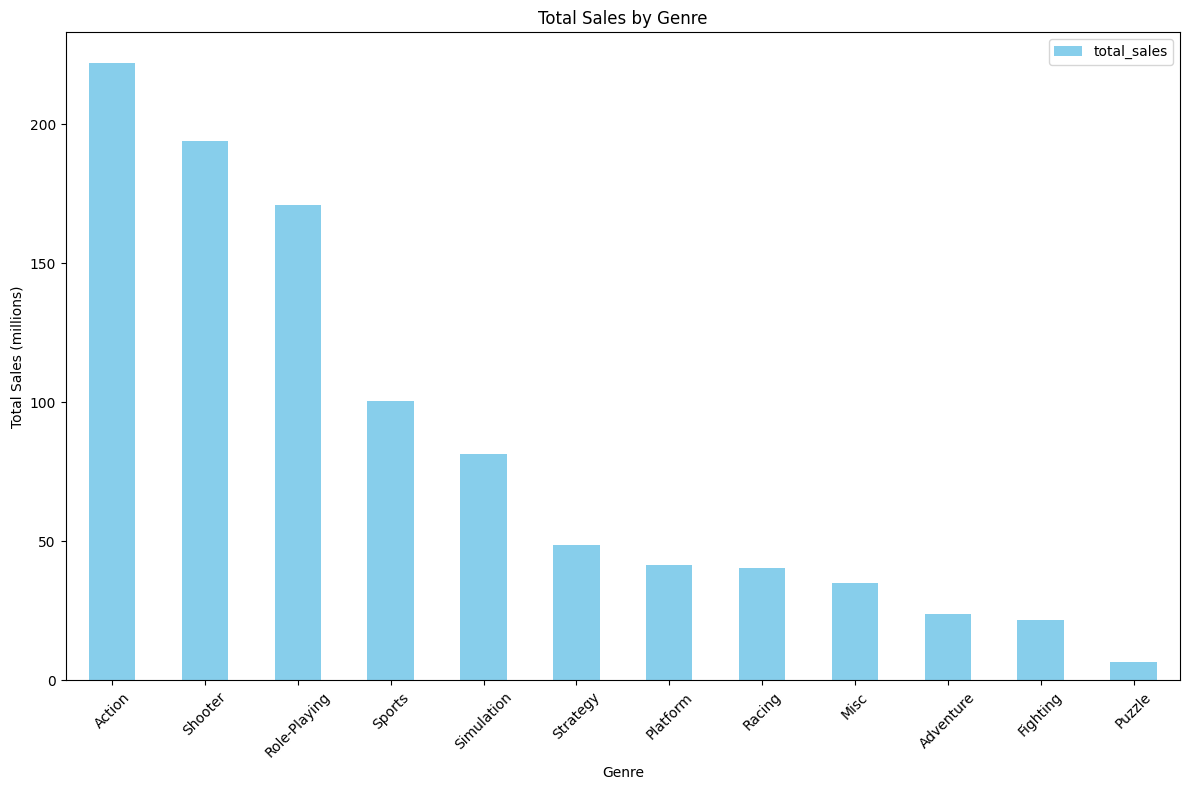

In [70]:
#Created a bar graph to show sales by genre
genre_sales.plot(kind='bar', x='genre', figsize=(12, 8), color='skyblue' )
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
genre_counts = rel_platforms.groupby('genre')['total_sales'].count().reset_index()
genre_counts = genre_counts.rename(columns={'total_sales': 'count'})
average_sales_by_genre = pd.merge(genre_sales, genre_counts, on='genre', how='outer')
average_sales_by_genre['mean_sales'] = average_sales_by_genre['total_sales'] / average_sales_by_genre['count']
average_sales_by_genre

,genre,total_sales,count,mean_sales
0,Action,221.96,582,0.381375
1,Shooter,194.01,232,0.836250
2,Role-Playing,170.99,255,0.670549
3,Sports,100.47,159,0.631887
4,Simulation,81.39,159,0.511887
5,Strategy,48.83,209,0.233636
6,Platform,41.61,56,0.743036
7,Racing,40.58,107,0.379252
8,Misc,35.01,115,0.304435
9,Adventure,23.87,144,0.165764


### Conclusions on Sales by Genre ###
The most profitable genres appear to be action based or immersive in nature with action being the most popular and encompassing of multiple other genres (fantasy, fighting, etc.). However when we look at the average sales per game when it comes to genre we see that the Shooter genre sells the best per game and the amount of games released in the action genre far exceed that of the others and this has skewed the data somewhat. Other genres like puzzle and fighting have a much lower count of games explicitly in that genre. given this information it's clear to see many genres outperformed action on average given the fact that they had much fewer games released such as in the case with fighting, platorm, etc. 

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2:</b>
    
Great additional evaluation! This could be a valuable insight for a store manager.

<div style="background-color: #f8d7da; color: #721c24; padding: 15px; border-radius: 4px; border: 1px solid #f5c6cb;"> 
    
<b>Reviewer's comment v1:</b>

You correctly pointed out that the Action genre has the highest total sales. However, it’s important to consider not only the total revenue, but also the average (or median) sales per game within each genre.

High total sales might simply reflect that more games are released in the Action genre, rather than each individual game generating more revenue. There may be other genres with fewer games but comparable-or even higher-sales per game.

I recommend additionally calculating the average or median revenue for each genre. This will help you draw more accurate and well-founded conclusions about sales performance.

## Profiles for Each Region: ##

In [72]:
#Created 'na_sales' dataframe
na_sales = df_ice.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
na_sales = na_sales.head()
na_sales

platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

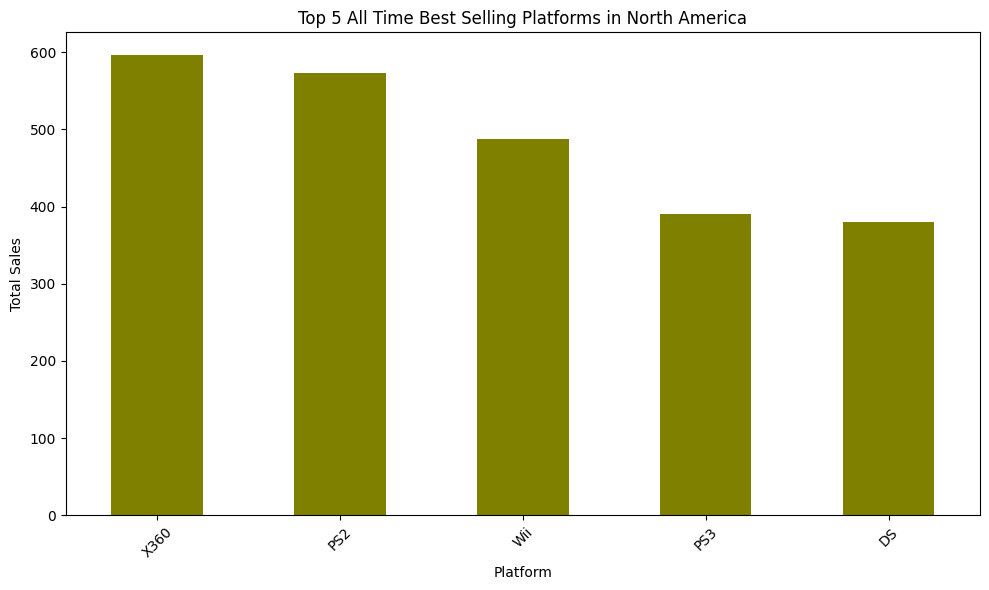

In [73]:
#Created a bar plot for sales in NA
plt.figure(figsize=(10, 6))
na_sales.plot(kind='bar', color='olive')
plt.title('Top 5 All Time Best Selling Platforms in North America')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
eu_sales = df_ice.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
eu_sales = eu_sales.head()
eu_sales

platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64

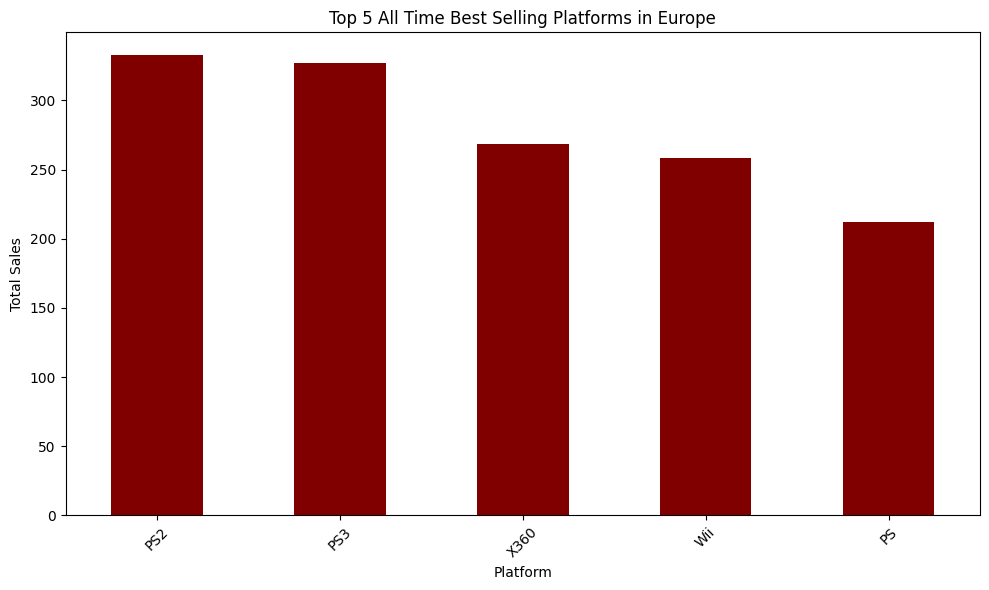

In [75]:
plt.figure(figsize=(10, 6))
eu_sales.plot(kind='bar', color='maroon')
plt.title('Top 5 All Time Best Selling Platforms in Europe')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
jp_sales = df_ice.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
jp_sales = jp_sales.head()
jp_sales

platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64

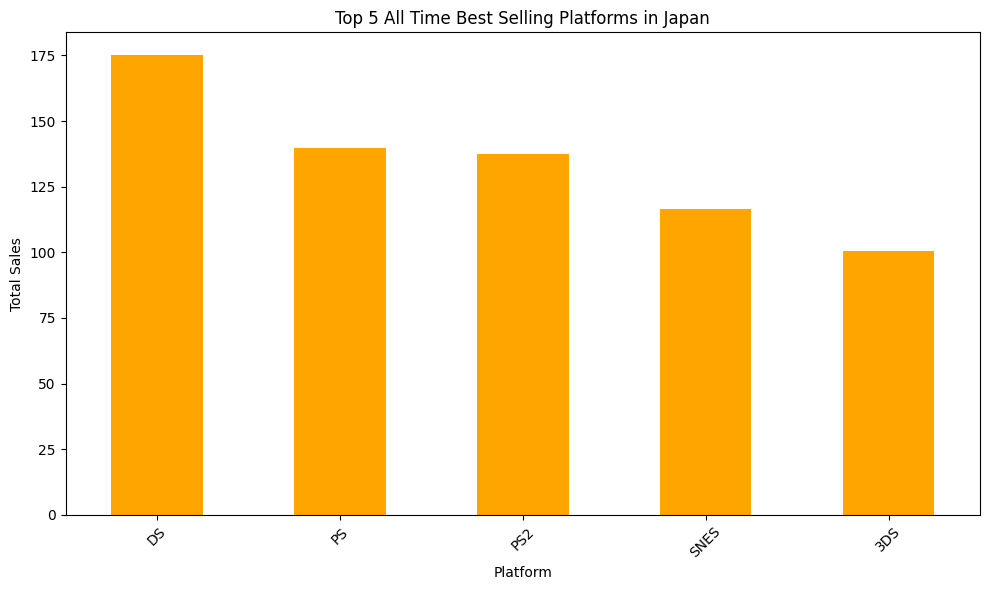

In [77]:
plt.figure(figsize=(10, 6))
jp_sales.plot(kind='bar', color='orange')
plt.title('Top 5 All Time Best Selling Platforms in Japan')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Conclusions for Platform Based Sales per Region: ###
From the data it's clear to see some noteable changes from region to region, with the market share in each being dominated by different companies. Now this data represents all time sales and has moved away from the platforms we used for our analysis up to this point however all of these platforms are either earlier versions or part of the parent companies that own/distribute the platforms we looked at previously (XBOX One, PS4, 3DS) and offer insight into the success of those parent companies as a whole. It is clear to see in markets from all regions that Japanese companies dominate in the video game market with PlayStation and all Nintendo platforms originating in Japan. In North America you can find the only outlier where the best selling platform is the XBOX 360 which is the only platform that originates from the United States itself, all of the other top sellers are either a version of the PlayStation or a Nintendo platform and respectively have an even share of the North American market. In Europe the XBOX 360 again makes an appearance this time as the third best selling in Europe, but the majority of the market here is dominated by PlayStation, with the Wii being the only Nintendo product featured. Japan however has a market completely dominated by Japanese platforms with the Nintendo DS being the best selling of all time and Nintendo products covering 3 out of 5 best selling in Japan and PlayStation filling in the last 2 spots, the overall sales based off platform is much lower for the Japanese market however there is a much smaller population there than in Europe and North America as a whole.

In [78]:
#Created a new dataframe for sales by genre for each region 
na_genre_sales = rel_platforms.groupby('genre')['na_sales'].sum().reset_index()
eu_genre_sales = rel_platforms.groupby('genre')['eu_sales'].sum().reset_index()
jp_genre_sales = rel_platforms.groupby('genre')['jp_sales'].sum().reset_index()
regional_genre_sales = pd.merge(na_genre_sales, eu_genre_sales, on='genre', how='outer')
regional_genre_sales = regional_genre_sales.merge(jp_genre_sales, on='genre', how='outer')
regional_genre_sales 

,genre,na_sales,eu_sales,jp_sales
0,Action,83.84,85.64,28.61
1,Adventure,6.08,12.67,3.24
2,Fighting,9.74,5.84,3.98
3,Misc,16.23,10.20,5.94
4,Platform,16.28,14.80,6.97
5,Puzzle,1.39,2.85,1.80
6,Racing,13.63,19.64,3.14
7,Role-Playing,56.35,55.82,45.52
8,Shooter,88.34,79.13,3.34
9,Simulation,27.73,37.52,10.57


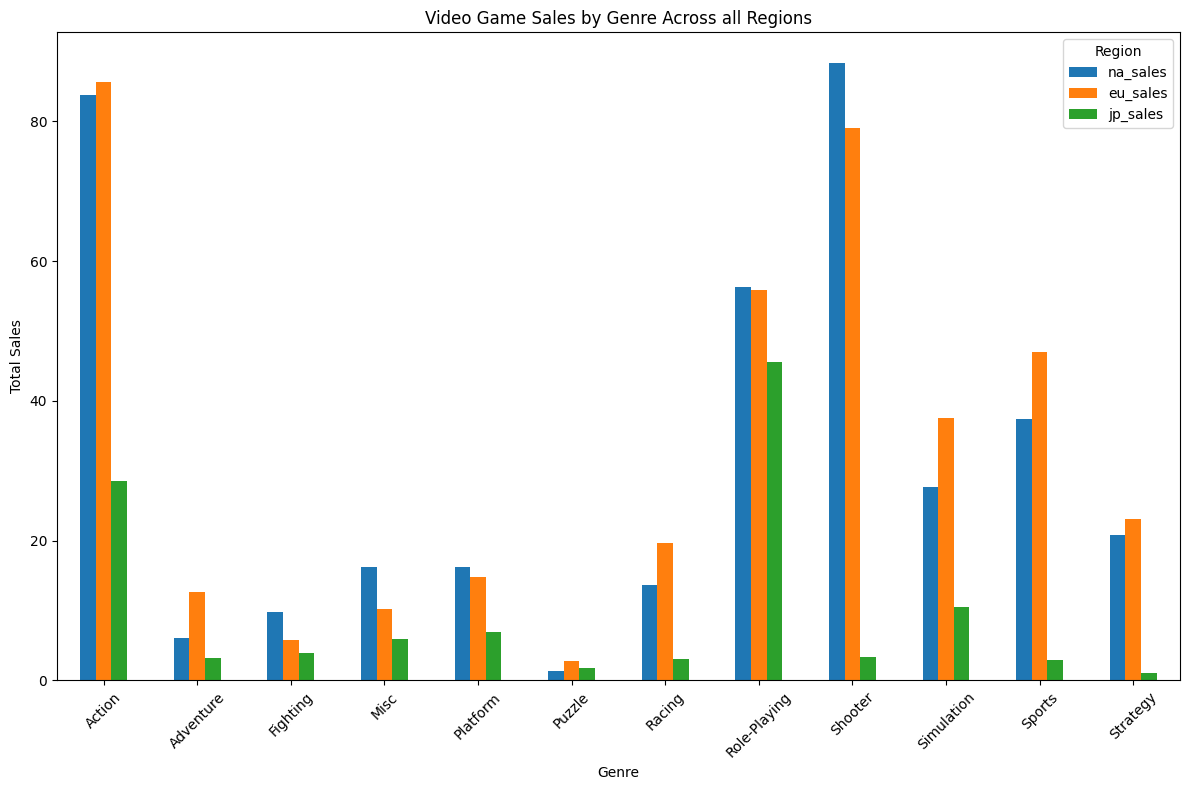

In [79]:
#Created a bar chart showing side by side of the sales in each region
regional_genre_sales.plot(kind='bar', x='genre', figsize=(12, 8))
plt.title('Video Game Sales by Genre Across all Regions')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Note:**
Excluded the 'Unknown' genre as that contained the missing values in the 'genre' column and would have skewed the data and made it harder to analyse as it is no one genre.

### Conclusions for Regional Sales by Genre: ##
Action is the most popular when it comes to North America and Europe but is the 2nd most popular genre in Japan, Japan's best selling genre is role playing and is the only area in which the total sales for the genre supersedes that of both North America and Europe indicating that perhaps the interests of gamers in Japan is somewhat different than those in Europe in America. The data overall may be skewed by the difference in population size as well as there are more people in both North America and Europe. Another example in the difference between Japanese audiences and Europe and North American audiences is in shooter games which sold fairl well in both Europe and America but in Japan did not do as well, with strategy, sports, and even racing selling more than shooters in Japan. European video game consumption is largely congregated on action, shooters and sports. Relatively low sellers across the board include adventure, puzzle and strategy games. This is largely a first look and as discussed earlier the quantity of games released in certain genres has an effect on the total sales of games classified and may not indicate they sell the best on average just that they sell the most

In [80]:
#Created a dataframe for sales based on ESRB rating scale
rating_sales = rel_platforms.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
rating_sales

,rating,na_sales,eu_sales,jp_sales
0,E,70.97,75.97,22.68
1,E10+,33.07,26.79,5.23
2,EC,0.09,0.00,0.00
3,K-A,2.30,0.11,0.00
4,M,116.80,125.48,7.21
5,RP,0.00,0.03,0.00
6,T,66.44,75.26,9.99
7,Unknown,88.18,90.68,71.98


**Note:**
Discarded the 'Unknown' row as this contains only missing values and is not definable as a rating and may skew data. Opted to also drop any rating that had less than 5 million dollars associated with it, (e.g. EC, RP, etc.) as the monetary amount is too small to gain any valueable insight or information off of it. 

In [81]:
#Excluded unecessary rows with '.drop()'
rating_sales = rating_sales.drop([2, 3, 5, 7])
rating_sales

,rating,na_sales,eu_sales,jp_sales
0,E,70.97,75.97,22.68
1,E10+,33.07,26.79,5.23
4,M,116.80,125.48,7.21
6,T,66.44,75.26,9.99


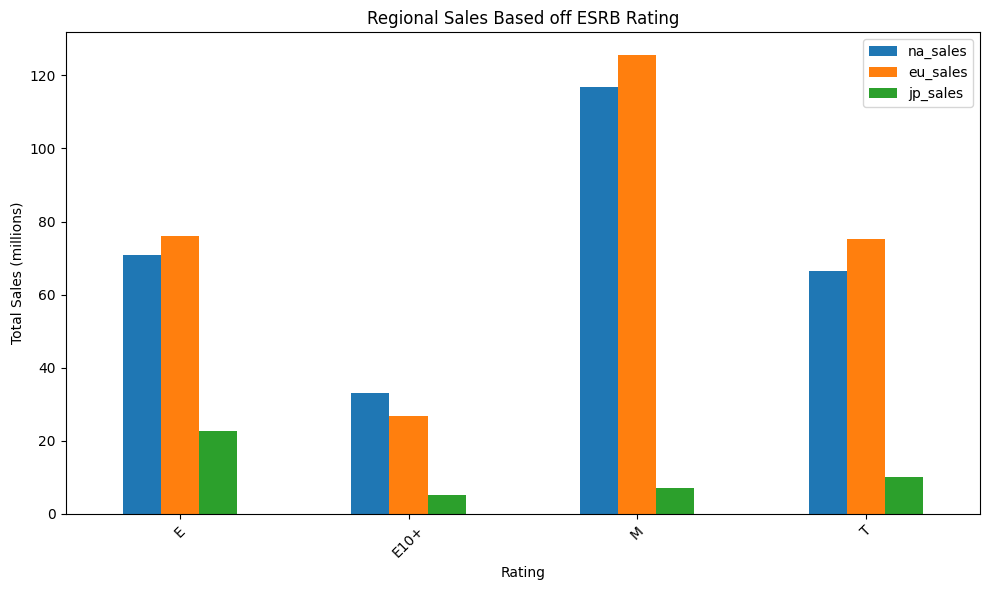

In [82]:
#Created bar plot for sales by ESRB rating 
rating_sales.plot(kind='bar', x='rating', figsize=(10, 6))
plt.title('Regional Sales Based off ESRB Rating')
plt.xlabel('Rating')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Conclusions for ESRB Rating's Influence on Price: ###
The best selling rating in all 3 regions is the E (everyone) rating as these are games catered to all ages and consequentially span all demographics creating a wider market for games with this ratings, as many genres from action to puzzle could have this rating and inflate the sales even more. The only notable difference in sales depending on rating from region to region is in the M (mature) and T (teen) rated games. In Europe and North America the sales for games with these ratings are largely similar in Japan however the games rated M are more than 50% less popular thn games rated T, this may be an indicator that Japanese audiences prefer more games suitable for the family and less violent and/or graphic than other audiences. This also is a reasonable assumption given the fact that action, fighting and shooter games were all less popular in Japan than the other regions. This shows that rating has somewhat of an effect on sales as games rated suitable for everyone and games with the smaller demographics that span fewer genres (like E10+) are typically less popular in all regions. Though these findings may be skewed by some factors such as differences in population size by region and personal/cultural taste of each region. 

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>

Looks great! 

As a second approach, you could also arrange subplots using plotly in the following way: 
    
```
# Create individual pie charts with Plotly Express
fig_jp = px.pie(jpesrb_sort, values='jp_sales', names='rating', title='ESRB-JP')
fig_eu = px.pie(euesrb_sort, values='eu_sales', names='rating', title='ESRB-EU')
fig_na = px.pie(naesrb_sort, values='na_sales', names='rating', title='ESRB-NA')

# Create a subplot grid with 1 row and 3 columns
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

# Add each pie chart to the subplot
fig.add_trace(fig_jp.data[0], row=1, col=1)
fig.add_trace(fig_eu.data[0], row=1, col=2)
fig.add_trace(fig_na.data[0], row=1, col=3)

# Update layout to show the titles properly
fig.update_layout(title_text="ESRB Ratings Comparison", showlegend=False)

# Show the combined plot
fig.show()
```

## Hypothesis Testing: ##

**Testing the hypothesis that the average user ratings of Xbox One and PC are the same.**
- Null Hypothesis: The mean for average user ratings of both platforms is the same. 
- Alt Hypothesis: The mean for average user ratings of both platforms is different.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
Everything is correct here. Hypotheses have been formulated correctly.

<div style="background-color: #f8d7da; color: #721c24; padding: 15px; border-radius: 4px; border: 1px solid #f5c6cb;"> 

<b>Reviewer's comment v1:</b>

Here and in the following steps, you need to use the filtered DataFrame so that you are working only with the latest data.



In [83]:
rel_platforms['user_score'] = pd.to_numeric(rel_platforms['user_score'], errors='coerce')

/tmp/ipykernel_49/3039605543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_platforms['user_score'] = pd.to_numeric(rel_platforms['user_score'], errors='coerce')


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2:</b>
    
Thank you for updating it! 

In [84]:
xbox_ratings = rel_platforms[rel_platforms['platform'] == 'XOne']['user_score']
pc_ratings = rel_platforms[rel_platforms['platform'] == 'PC']['user_score']
t_stat, p_value = ttest_ind(xbox_ratings, pc_ratings, equal_var=False)
print(f"p-value: {p_value}")
print(f"t-statistic: {t_stat}")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: average ratings are different.")
else:
    print("Fail to reject null hypothesis: no significant difference in average rating.")

p-value: 0.0006312657449613953
t-statistic: -3.445790627024438
Reject the null hypothesis: average ratings are different.


**Testing the hypothesis that the average user ratings for Action and Sports are different.**
- Null Hypothesis: The average user rating for both genres are the same. 
- Alt Hypothesis: The average user rating for both genres are different.

In [85]:
action_ratings = rel_platforms[rel_platforms['genre'] == 'Action']['user_score'].dropna()
sports_ratings = rel_platforms[rel_platforms['genre'] == 'Sports']['user_score'].dropna()
t_stat, p_value = ttest_ind(action_ratings, sports_ratings, equal_var=False)
print(f"p-value: {p_value}")
print(f"t-statistic: {t_stat}")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: average ratings are different.")
else:
    print("Fail to reject null hypothesis: no significant difference in average rating.")

p-value: 0.6284467512868042
t-statistic: -0.48440748287696056
Fail to reject null hypothesis: no significant difference in average rating.


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1:</b>
    
Great job! Your results and conclusions are correct.

Additionally, you can compare the variances of the samples before testing your hypotheses to determine which value to use for the equal_var parameter in the ttest_ind method (by default, it is set to True). You can calculate the variances manually, or use Levene’s test or Bartlett’s test to check for equality of variances.

1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html

### Conclusions for Hypotheses Testing: ###
When forming the null hypotheses aboce used the principle that there would be no change between groups when running a statistical test and the opposit for the alternate hypothesis that there would be a change after running the test. In the first hypothesis the p-value is less than the significance level meaning there is a statistically significant difference in the average user ratings between Xbox One and PC platforms. We have sufficient evidence to conclude that the average user ratings between Xbox One and PC are not the same. In the second case we can't reject the null hypothesis as the p-value exceeds our alpha value indicating that the deviation from the idea that there is no significant difference in average rating is not statistically significant enough to say there is a difference in the ratings. 

# Overall Conclusion: #
Overall we have gained great insight into the data we needed to build a synopsis for the year of 2017 and seen trends on the lifetime of various platforms and which ones may be the most profitable going forward. The results indicated that the Play Station 4, Xbox One, the 3DS and PC platforms are the most profitable as of 2016, headed into 2017 and would be a wise choice to invest in as they are becoming some of the most profitable platforms and are distributed by the most profitable companies overall. Can see that overall video game production peaked from 2006 to 2011 and many platforms peaked and faded around that time too. We can see that user and critic scores also correlate with sales and that typically the higher the review the higher the sales although there isn't a strict correlation between user and critic reviews themselves (some might be higher rated by users and lower by critics and vice versa). Handhelds consoles have largely faded in popularity with the 3DS being a notable exception, it is also clear to see that the majority of the market in North America, Europe and Japan is dominated by Japanese companies/manufacturers. With the only major player outside of Japan being Xbox, the only American distributer with the best selling platform (XBOX 360) in the US and the third best in Europe. However the Japanese market is completely dominated by Japanese companies with Nintendo holding 3 out 5 best selling platforms and PlayStation holding the other 2. Its also clear to see that different genres are more popular from region to region with role-playing games being more popular in Japan than in North America and Europe and action games being more popular outside of Japan. Also through the analysis have found that the ESRB rating has some correlation with sales with the E (everyone) rating being most popular in all regions, this is likely due to the fact that this rating encompasses a large number of genres, platforms and games that are inclusive to all demographics and also that M (mature) rated games are more popular in Europe and North America than in Japan. 

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v1</b>
 
You did an excellent job analyzing the data and drawing conclusions!

It’s great that you pay attention to formulating interim conclusions in your project-this is an excellent practice that will benefit you in future projects. Keep using this approach, as it makes your analysis more structured and easier for readers and colleagues to understand.

Additionally, it’s fantastic that you included valuable insights about trends in the gaming industry. You did a great job highlighting key points and interpreting them clearly.

Overall, excellent work! Keep it up! 😊